In [1]:
import sys
import json
import matplotlib.pyplot as plt

sys.path.append("..")

Matplotlib is building the font cache; this may take a moment.


In [2]:
from src.cipher_utils import encode, create_encryption_dict
from src.corpus_utils import get_letter_frequencies
from src.mcmc import cross_validation, eval_solutions, eval_close_solutions, is_close_solution

In [3]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [4]:
print(f"Text length: {len(text)}")

Text length: 468


In [5]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

with open("../data/en_corpus.txt") as file:
    corpus = file.read().lower()

encryption_dict = create_encryption_dict()
encoded_text = encode(text, encryption_dict)
attempts = 50
iters = 25000

In [6]:
print("Original text:\n")
print(text)
print("\nEncoded text:\n")
print(encoded_text)

Original text:

whiskers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty boxes, he found his prize: a forgotten box of tuna. he purred victoriously, the fearless feline captain of tuna island.

Encoded text:

7:mzhl zs7bzs8?s? 4m8b gs6bks:lsyl2mlol4s:ls7bzsbsfm bkluslb6:s3? 8m8;ps:ls62m3yl4sk:lskb22lzksz:l2,sm8sk:ls:?jzlps3l?7l4s2mhlsbs6bfkbm8psb84sybkkl4s4?78sb8gk:m8;sm8s:mzsfbk:us?8ls4bgps:ls4mz6?ol l4sbs6 j3f2l4sk lbzj ls3bfsj84l sk:ls j;uskbm2s:m;:ps:ls,?22?7l4smksk: ?j;:sk:ls;b 4l8psj84l sk:ls,l86lpsb84sm8k?sk:ls8lm;:y? zsz:l4usk:l lpsb3?8;s4jzkgsy?0lzps:ls,?j84s:mzsf mqldsbs,? ;?kkl8sy?0s?,skj8bus:lsfj  l4som6k? m?jz2gpsk:ls,lb 2lzzs,l2m8ls6bfkbm8s?,skj8bsmz2b84u


In [7]:
corpus_letters, corpus_frequencies = get_letter_frequencies(corpus)
text_letters, text_frequencies = get_letter_frequencies(encoded_text)

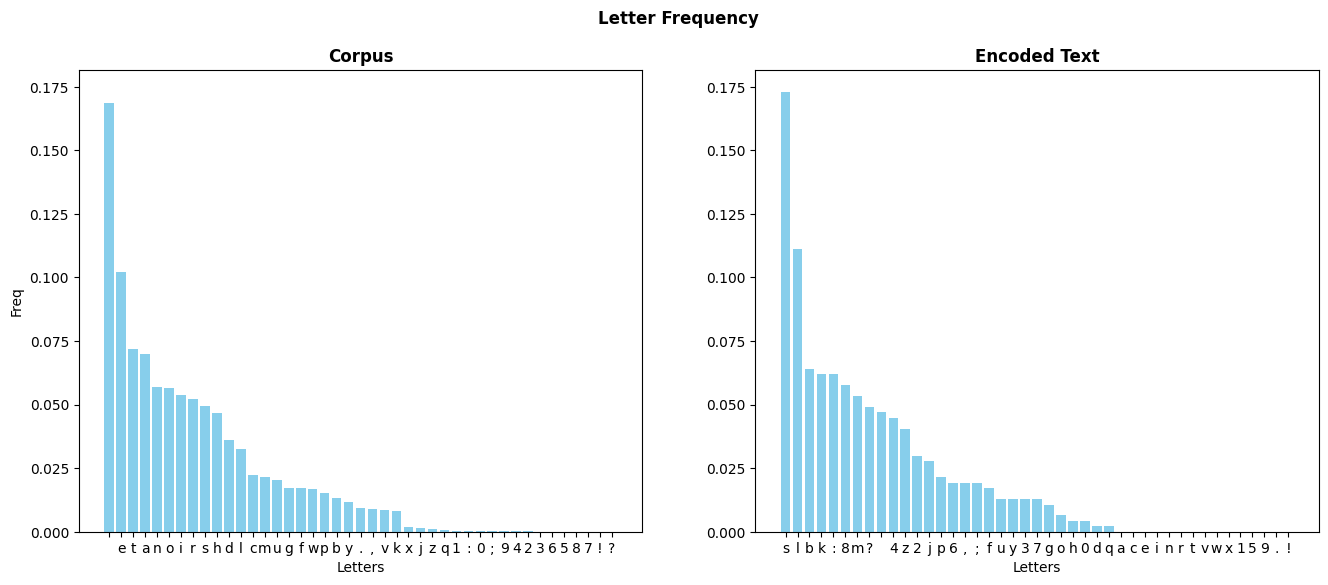

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle("Letter Frequency", fontweight="bold")

ax1.bar(corpus_letters, corpus_frequencies, color="skyblue")
ax1.set_xlabel("Letters")
ax1.set_ylabel("Freq")
ax1.set_title("Corpus", fontweight="bold")

ax2.bar(text_letters, text_frequencies, color="skyblue")
ax2.set_xlabel("Letters")
ax2.set_title("Encoded Text", fontweight="bold")
ax2.tick_params(labelleft=True)

plt.show()

We ary trying to improve the algorithm by specifying starting encryption dict. In default implementation the random one is used. Here we suppose that letters with high frequencies in encoded text were originally letters with high frequencies in corpus.

In [8]:
freq_based_encryption_dict = {corpus_letters[i]: text_letters[i] for i in range(len(corpus_letters))}
print(freq_based_encryption_dict)

{' ': 'l', 'e': 's', 't': ',', 'a': '3', 'n': '8', 'o': '9', 'i': 'j', 'r': 'r', 's': 'm', 'h': '.', 'd': 'h', 'l': '5', 'c': 'o', 'm': '0', 'u': 'i', 'g': 'u', 'f': ';', 'w': 'g', 'p': 'd', 'b': 'n', 'y': 't', '.': '1', ',': 'q', 'v': 'b', 'k': '4', 'x': '?', 'j': '2', 'z': '6', 'q': 'a', '1': 'c', ':': 'e', '0': 'f', ';': 'k', '9': 'p', '4': 'v', '2': 'w', '3': 'x', '6': 'y', '5': 'z', '8': '7', '7': ' ', '!': '!', '?': ':'}


In [9]:
all_samples, all_scores = cross_validation(attempts, encoded_text, perc_dict, iters)
all_samples_freq, all_scores_freq = cross_validation(attempts, encoded_text, perc_dict, iters, encryption_dict=freq_based_encryption_dict)

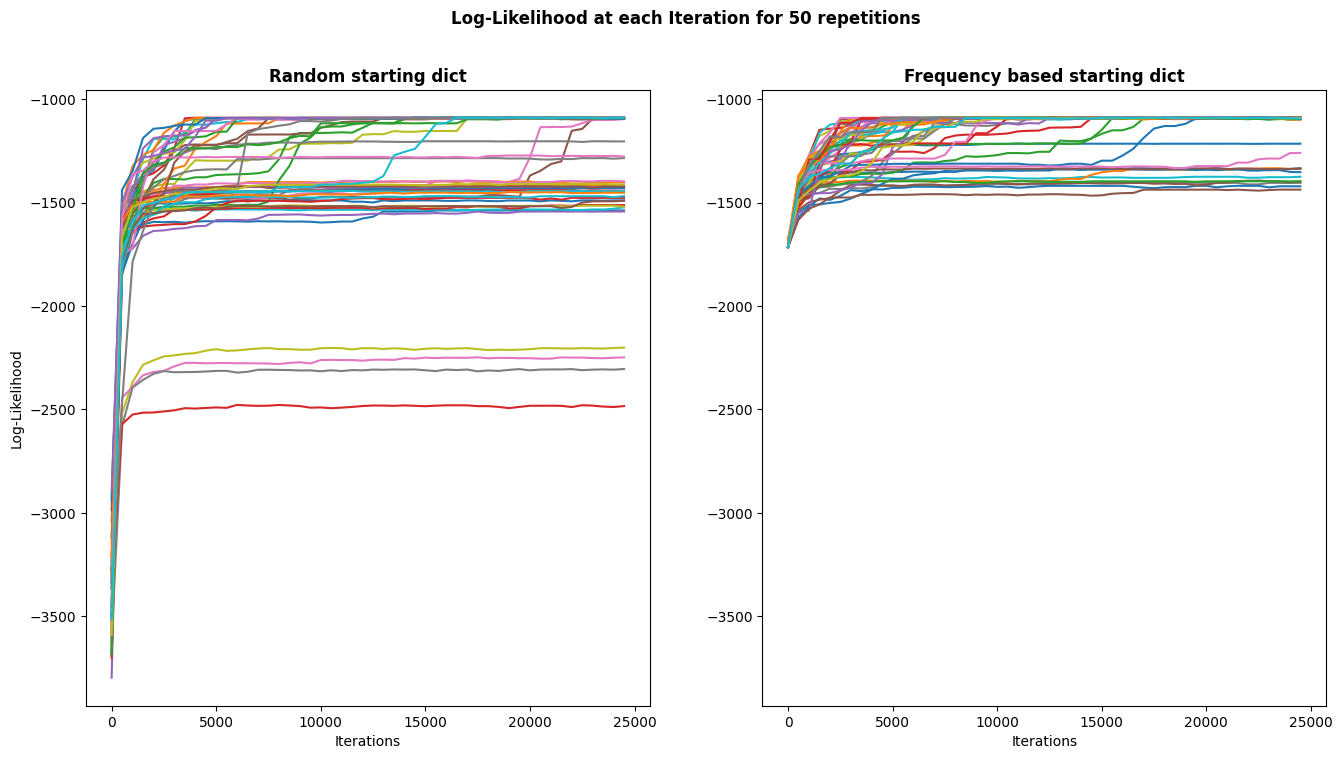

In [ ]:
range_iters = list(range(0, iters+1, 500))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.suptitle(f"Log-Likelihood at each Iteration for {attempts} repetitions", fontweight="bold")

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Log-Likelihood")
ax1.set_title("Random starting dict", fontweight="bold")
for i in range(len(all_scores)):
    ax1.plot(range_iters, all_scores[i])

ax2.set_xlabel("Iterations")
ax2.set_title("Frequency based starting dict", fontweight="bold")
ax2.tick_params(labelleft=True)
for i in range(len(all_scores_freq)):
    ax2.plot(range_iters, all_scores_freq[i])

plt.show()

In [11]:
correct_decoding_ratio = eval_solutions(text, all_samples)
correct_decoding_ratio_freq = eval_solutions(text, all_samples_freq)
close_decoding_ratio = eval_close_solutions(text, all_samples, perc_dict)
close_decoding_ratio_freq = eval_close_solutions(text, all_samples_freq, perc_dict)

In [12]:
print("Evaluation:\n")
print(f"For {attempts} attempts with {iters} iterations each algorithm with random starting encryption dict found the correct solution with {correct_decoding_ratio} success ratio and close solution with {close_decoding_ratio} success ratio.")
print(f"For {attempts} attempts with {iters} iterations each algorithm with freq based starting dict found the correct solution with {correct_decoding_ratio_freq} success ratio and close solution with {close_decoding_ratio_freq} success ratio.")

Evaluation:

For 50 attempts with 25000 iterations each algorithm with random starting encryption dict found the correct solution with 0.1 success ratio and close solution with 0.46 success ratio.
For 50 attempts with 25000 iterations each algorithm with freq based starting dict found the correct solution with 0.14 success ratio and close solution with 0.76 success ratio.


In [15]:
for i in range(10):
    solution = all_samples_freq[i]
    correct_msg = "correct" if text == solution else "incorrect"
    close_msg = "close" if is_close_solution(text, solution, perc_dict) else "far"
    print(f"Frequency based solution {i+1} ({correct_msg}, {close_msg}):\n")
    print(solution)
    print("\n")

Frequency based solution 1 (incorrect, far):

pgosfels pts ra aldortlk utn ge hecoexed ge pts t ioltne, etug walrory. ge ucowhed nge ntccesn sgecm or nge gabse. weaped cofe t utintor. trd htnned dapr trkngory or gos itng, are dtk. ge dosuaxeled t ulbwiced nletsble wti brdel nge lby, ntoc goyg. ge maccaped on nglabyg nge ytlder. brdel nge merue. trd orna nge reoyghals sged, ngele. twary dbsnk hazes. ge mabrd gos ilojev t malyanner haz am nbrt, ge iblled xounaloabsck. nge metlcess mecore utintor am nbrt osctrd,


Frequency based solution 2 (correct, close):

whiskers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty boxes, he found his prize: a forgotten box of tuna. he purred victoriously, the fearless

In [9]:
texts = [
    "Every night, Luna the cat vanished. Her owner thought she slept by the window. One night, curiosity won. He followed her. Luna trotted across rooftops and slipped into a neighbors window. She returned with a toy mouse in her mouth. Turns out, Luna had been stealing toys from nearby homes and gifting them to the stray kittens in the alley. A thief, yes but a generous one.".lower(),
    "At the town library, a gray tabby named Whiskers roamed the shelves. No one knew who he belonged to, but every day hed curl up on someones book, as if approving their choice. One morning, a girl picked a book Whiskers sat on. Inside was a forgotten note: To whoever finds this thank you for reading. That book changed her life. Whiskers simply purred and moved to the next shelf.".lower(),
    "Milo, a ginger cat, boarded the 8 AM bus daily. The driver knew him and never charged fare. Milo sat near the window, hopping off at the park. Hed nap on a bench, chase birds, and return home by 5. Locals adored him he even had a tiny seat plaque: Reserved for Milo. No one ever figured out why he did it, but he never missed a day, even in rain. Some said he just liked the ride.".lower(),
    "Jasper loved socks. Every morning, his owner found mismatched pairs in the hallway. Thinking it was mischief, she started photographing them. One day, she noticed a pattern. The socks formed letters HELP. She followed Jasper to the neighbors window. Inside, an elderly woman had fallen. Thanks to Jaspers sock code, she got help in time. The hero never stopped purring.".lower(),
    "In the old district, cats gathered on rooftops every full moon. Residents heard eerie, harmonious meows drifting through the night. Some said it was just noise. Others swore it sounded like music. One night, a violinist joined in, playing softly from his balcony. The cats paused, then meowed in perfect rhythm. A duet of man and feline echoed through the city once in a lifetime.".lower()
]

In [10]:
samples = []
scores = []
freq_samples = []
freq_scores = []
for text in texts:
    encoded_text = encode(text, encryption_dict)
    letters, _ = get_letter_frequencies(encoded_text)
    freq_dict = {corpus_letters[i]: letters[i] for i in range(len(corpus_letters))}
    all_samples, all_scores = cross_validation(attempts, encoded_text, perc_dict, iters)
    all_samples_freq, all_scores_freq = cross_validation(attempts, encoded_text, perc_dict, iters, encryption_dict=freq_dict)
    samples.append(all_samples)
    scores.append(all_scores)
    freq_samples.append(all_samples_freq)
    freq_scores.append(all_scores_freq)

KeyboardInterrupt: 